In [11]:
import corner
import numpy as np
import json

import pyhf
pyhf.set_backend('jax')

import pymc as pm
import arviz as az

from Bayesian_pyhf import infer
from Bayesian_pyhf import plotting

%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
blue = '#1F449C'
pink = '#E57A77'

In [13]:
with open(f'SRee_SRmm_Srem.json') as serialized:
    spec = json.load(serialized)

workspace = pyhf.Workspace(spec)
workspace

model = workspace.model()

data = workspace.data(model, include_auxdata=False)

unconstr_priors = {
    f'{model.config.poi_name}': {'type': 'HalfNormal_Unconstrained', 'sigma': [1]}
}

act_aux_data = workspace.data(model)
n_draws = 20_000

In [5]:
model.config.par_map

{'lumi': {'slice': slice(0, 1, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_normal at 0x7fbe3be8f990>},
 'mu_Sig': {'slice': slice(1, 2, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fbe3c27a450>},
 'ucbSRee': {'slice': slice(2, 3, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_normal at 0x7fbe3c187dd0>},
 'SigXSec': {'slice': slice(3, 4, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_normal at 0x7fbe3c00b250>},
 'cuts_SRee_LRT': {'slice': slice(4, 5, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_normal at 0x7fbe3c00b510>},
 'cuts_SRee_LRTfilter': {'slice': slice(5, 6, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_normal at 0x7fbe3be8fa90>},
 'ucsSRee_Slep_1000_10': {'slice': slice(6, 7, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_normal at 0x7fbe3be8fb50>},
 'ucsSRee_disp': {'slice': slice(7, 8, None),
  'paramset': <pyhf.parameters.paramsets.constrained_by_norm

In [6]:
n_draws = 5_000

with infer.model(model, unconstr_priors, data):
    # step = pm.Metropolis()
    post_data = pm.sample(draws=n_draws, chains=1) #, step=step)
    post_pred = pm.sample_posterior_predictive(post_data)
    prior_pred = pm.sample_prior_predictive(n_draws)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [lumi, mu_Sig, ucbSRee, SigXSec, cuts_SRee_LRT, cuts_SRee_LRTfilter, ucsSRee_Slep_1000_10, ucsSRee_disp, ucsSRee_pileupWeight, ucbSRem, ucbSRmm, cuts_SRmm_LRT, cuts_SRmm_LRTfilter, ucsSRmm_Slep_1000_10, ucsSRmm_disp, ucsSRmm_mu_sel, ucsSRmm_mu_trig, ucsSRmm_pileupWeight]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 31 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [Expected_Data]


Sampling: [Expected_Data, SigXSec, cuts_SRee_LRT, cuts_SRee_LRTfilter, cuts_SRmm_LRT, cuts_SRmm_LRTfilter, lumi, mu_Sig, ucbSRee, ucbSRem, ucbSRmm, ucsSRee_Slep_1000_10, ucsSRee_disp, ucsSRee_pileupWeight, ucsSRmm_Slep_1000_10, ucsSRmm_disp, ucsSRmm_mu_sel, ucsSRmm_mu_trig, ucsSRmm_pileupWeight]


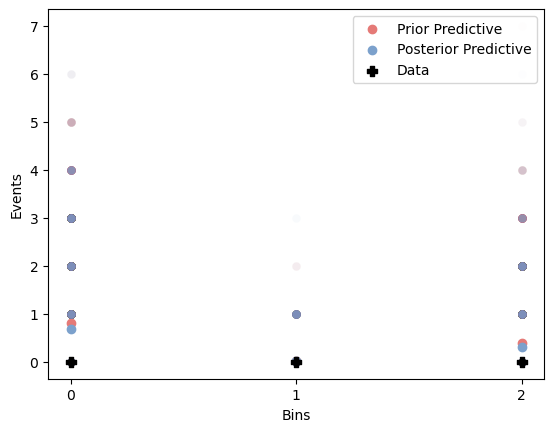

In [14]:
plotting.prior_posterior_predictives(model=model, data=data, post_pred=post_pred, prior_pred=prior_pred)

In [15]:
n_draws = 5_000

with infer.model(model, unconstr_priors, data):
    step = pm.Metropolis()
    post_data = pm.sample(draws=n_draws, chains=1, step=step)
    post_pred = pm.sample_posterior_predictive(post_data)
    prior_pred = pm.sample_prior_predictive(n_draws)

In [10]:
for i in (0, 1, 2):
    print(f'Prior: {np.array(prior_pred.prior_predictive.Expected_Data.T[i]).mean()}')
    print(f'Posterior: {np.array(post_pred.posterior_predictive.Expected_Data.T[i].mean())}')
    print('...')

    

Prior: 0.8138
Posterior: 0.6954
...
Prior: 0.0128
Posterior: 0.0148
...
Prior: 0.4044
Posterior: 0.3054
...
